# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [1]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



ModuleNotFoundError: No module named 'google'

In [2]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
# datadir = "/content/drive/My Drive/cs445_projects/proj1/" 
datadir = "./"

utilfn = datadir + "utils.py"
# !cp "$utilfn" .
import utils

In [3]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib notebook  
import matplotlib.pyplot as plt

In [219]:
# im1_file = datadir + 'nutmeg.jpg'
# im2_file = datadir + 'DerekPicture.jpg'

im1_file = datadir + '1.3.mummy.jpg'
im2_file = datadir + '1.3.vampire.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

<IPython.core.display.Javascript object>


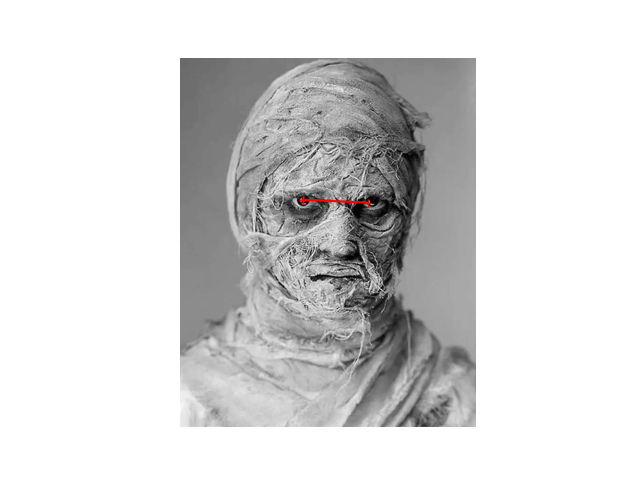

In [220]:
pts_im1 = utils.prompt_eye_selection(im1)
# pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

<IPython.core.display.Javascript object>


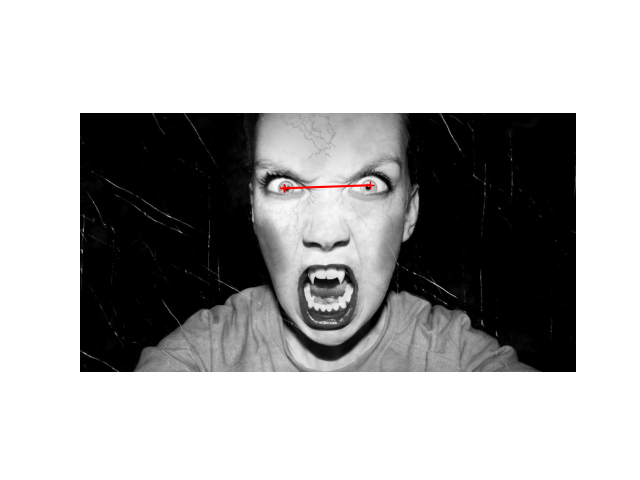

In [221]:
pts_im2 = utils.prompt_eye_selection(im2)
# pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [222]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [223]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

<IPython.core.display.Javascript object>


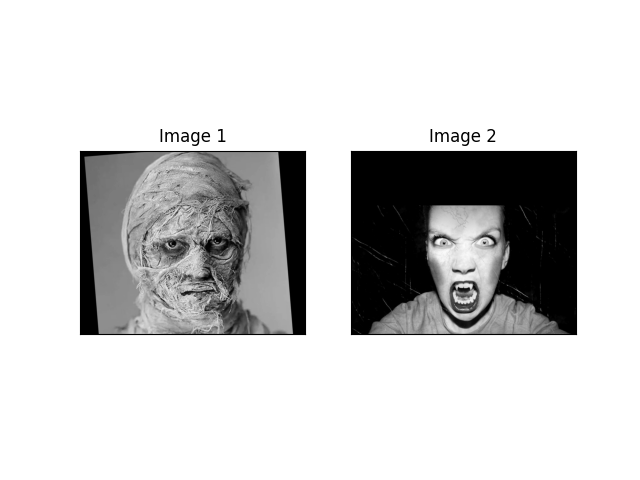

In [224]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [214]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here  
    (im1_h, im1_w) = im1.shape
    kernel = utils.gaussian_kernel(sigma_low, sigma_low * 3)
    kernel_h, kernel_w = kernel.shape[0] // 2, kernel.shape[1] // 2
    fft_size = 1024
    im1_fft_int = np.fft.fft2(im1, (fft_size, fft_size))
    im1_fft_kernel = np.fft.fft2(kernel, (fft_size, fft_size))
    
    im1_filtered = np.fft.ifft2(im1_fft_int * im1_fft_kernel)
    im1_filtered = im1_filtered[kernel_h:kernel_h + im1_h, kernel_w: kernel_w + im1_w]
    im1_filtered = np.real(im1_filtered)
    
    
    (im2_h, im2_w) = im2.shape
    kernel = utils.gaussian_kernel(sigma_high, sigma_high * 3)
    kernel_h, kernel_w = kernel.shape[0] // 2, kernel.shape[1] // 2
    fft_size = 1024
    im2_fft_int = np.fft.fft2(im2, (fft_size, fft_size))
    im2_fft_kernel = np.fft.fft2(kernel, (fft_size, fft_size))
    
    im2_filtered = np.fft.ifft2(im2_fft_int * im2_fft_kernel)
    im2_filtered = im2_filtered[kernel_h:kernel_h + im2_h, kernel_w: kernel_w + im2_w]
    im2_filtered = im2[:np.real(im2_filtered).shape[0], :] - np.real(im2_filtered)
    
    return im2_filtered + im1_filtered[:im2_filtered.shape[0], :im2_filtered.shape[1]]

#     kernel_low = utils.gaussian_kernel(sigma_low, sigma_low * 3)
#     kernel_high = utils.gaussian_kernel(sigma_high, sigma_high * 3)
#     im1_low_fit = signal.convolve2d(im1, kernel_low, boundary='symm', mode='same')
#     im2_high_fit = im2 - signal.convolve2d(im2, kernel_high, boundary='symm', mode='same')
    
    
    # fft
#     fft1 = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1))))
#     fft2 = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2))))
#     fil_fft1 = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1_low_fit))))
#     fil_fft2 = np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2_high_fit))))
    
#     fig, axes = plt.subplots(2, 2)
#     axes[0].imshow(im1_low_fit)
#     axes[1].imshow(im2_high_fit)

#     axes[0][0].imshow(fft1)
#     axes[0][1].imshow(fft2)
#     axes[1][0].imshow(fil_fft1)
#     axes[1][1].imshow(fil_fft2)

    
    return im1_low_fit + im2_high_fit


In [237]:
sigma_low = 6 # choose parameters that work for your images
sigma_high = 20

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)


<IPython.core.display.Javascript object>


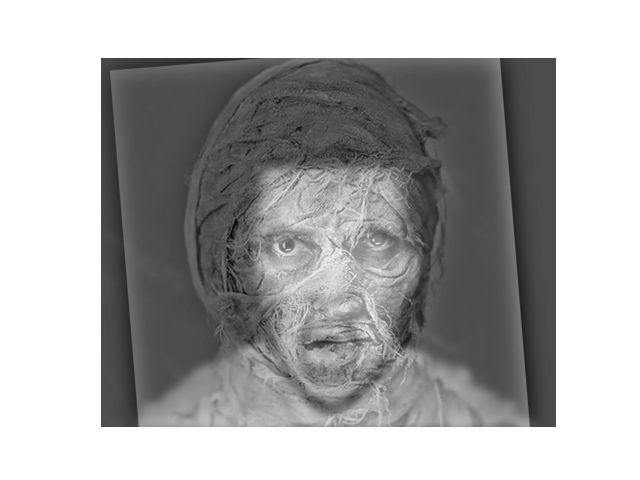

In [238]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

<IPython.core.display.Javascript object>


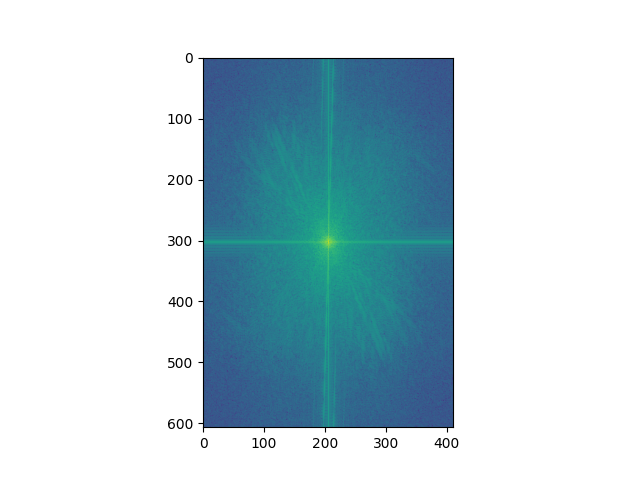

In [206]:
# fft
plt.figure()
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im_hybrid)))))

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

<IPython.core.display.Javascript object>


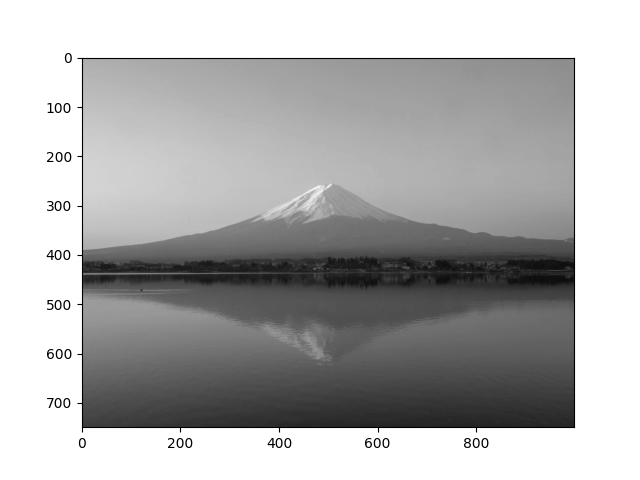

<IPython.core.display.Javascript object>


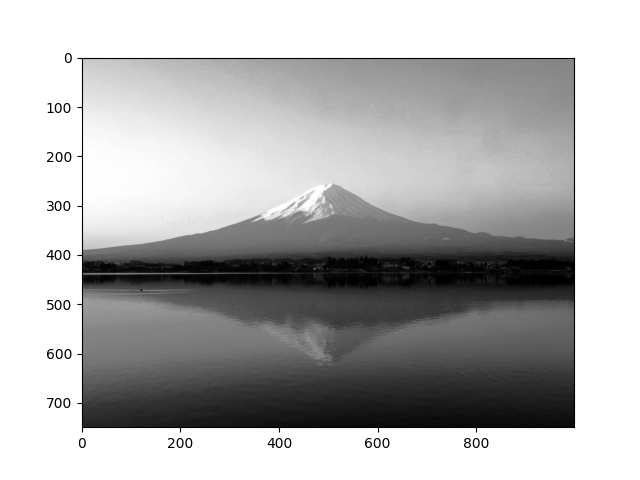

In [207]:
im_file = './2.fuji.jpg'
im = cv2.imread(im_file, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(im, cmap='gray')

im_eq = cv2.equalizeHist(im)
plt.figure()
plt.imshow(im_eq, cmap='gray')

#### Color enhancement 

<IPython.core.display.Javascript object>


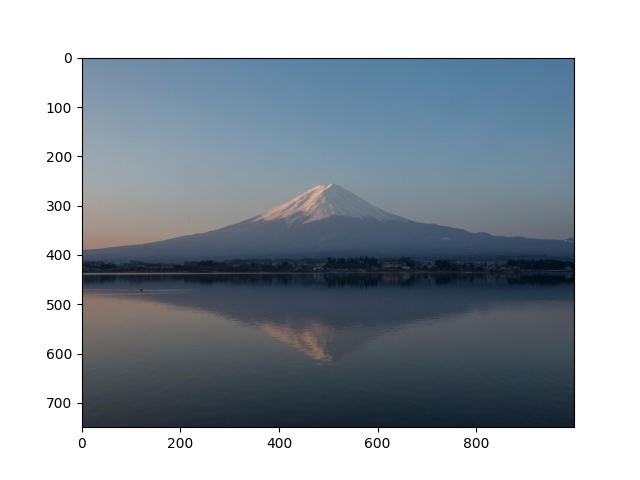

<IPython.core.display.Javascript object>


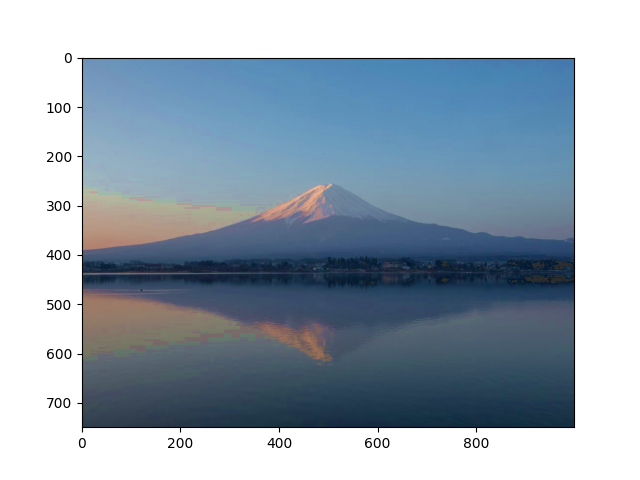

In [239]:
im_file = './2.fuji.jpg'
im = cv2.cvtColor(cv2.imread(im_file, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(im)

hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

# increase v(alue)
s_out = np.minimum(255, s + 30)
v_out = np.minimum(255, v + 20)
hsv_out = cv2.merge((h, s_out, v_out))
im_out = cv2.cvtColor(hsv_out, cv2.COLOR_HSV2RGB)

plt.figure()
plt.imshow(im_out)

#### Color shift

<IPython.core.display.Javascript object>


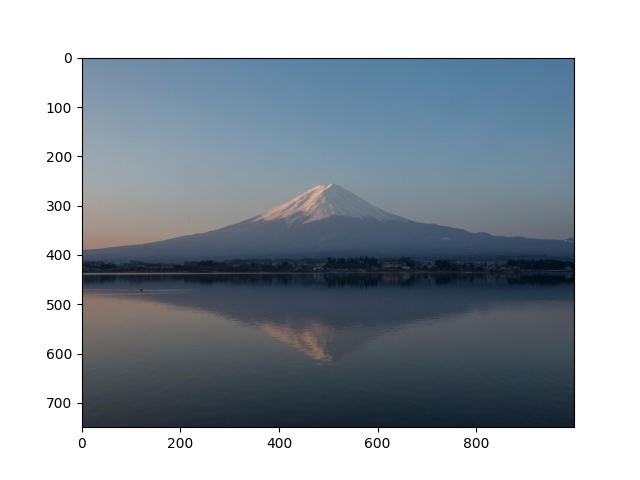

<IPython.core.display.Javascript object>


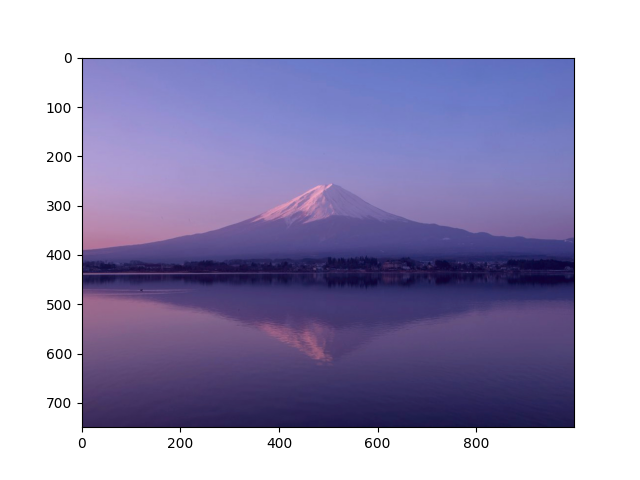

In [240]:
im_file = './2.fuji.jpg'
im = cv2.cvtColor(cv2.imread(im_file, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(im)

lab = cv2.cvtColor(im, cv2.COLOR_RGB2LAB)
l, a, b = cv2.split(lab)

a_out = np.minimum(255, a + 20)
b_out = np.minimum(255, b - 20)
lab_out = cv2.merge((l, a_out, b_out))

im_out = cv2.cvtColor(lab_out, cv2.COLOR_LAB2RGB)
plt.figure()
plt.imshow(im_out)